## Problem statement:
To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.

### Importing necessary libraries and reading the dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Setting display option to show all columns
pd.set_option('display.max_columns', None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Business Cases/Credit_score.csv", low_memory=False)

### Finding basic charachteristics and performing EDA:

In [6]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


In [7]:
print('No.of Rows: ', df.shape[0])
print('No.of Columns: ', df.shape[1])

No.of Rows:  100000
No.of Columns:  27


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [9]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


- In the numerical columns such as 'Num_Bank_Accounts', 'Interest_Rate', 'Num_Credit_Card' etc., the maximum values are way out of normal ranges for those columns. It clearly shows that there are some outliers.

In [10]:
df.describe(include = 'object')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,3635,4,13178,404,3,91049,7,98790
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9


**Observations:**
- There are 12500 unique customer IDs indicating that the data is of 12500 customers.
- There are only 8 different months. Need to analyze the data to find what's missing.
- There are 1788 unique age values which is not possible.
- There are 12501 Social Security Numbers for 12500 customers, which is not possible as there cannot be multiple SSN for a single citizen. And also the most frequent SSN is a random value.
- There are some special charachters in some columns which should be of a number. Need to clean those columns.

### Data Cleaning and Processing: Missing values, inconsistent values and outliers

In [11]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


#### 'Name' and 'Monthly_Inhand_Salary'

Let's fill the null values in 'Name' and 'Monthly_Inhand_Salary' columns using those values from same customer_id's.

In [12]:
df.sort_values(by=['Customer_ID', 'Month'], inplace=True)
df['Name'] = df.groupby('Customer_ID')['Name'].fillna(method='ffill').fillna(method='bfill')

In [13]:
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].fillna(method='ffill').fillna(method='bfill')

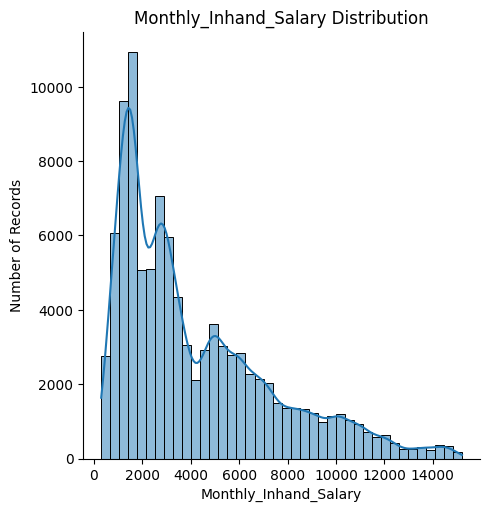

In [14]:
sns.displot(data=df, x=df['Monthly_Inhand_Salary'], kde=True, bins=40)
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Number of Records')
plt.title('Monthly_Inhand_Salary Distribution')
plt.xticks(rotation=0)
plt.show()

In [15]:
df['Month'].value_counts()

,count
Month,
April,12500
August,12500
February,12500
January,12500
July,12500
June,12500
March,12500
May,12500


- There is no data in the months of September - December.

#### Feature: Age

In [16]:
# Finding all special characters in the Age column
special_characters = set()

for value in df['Age']:
    for char in value:
        if not char.isdigit():
            special_characters.add(char)

print("Special characters in the 'Age' column:", special_characters)

Special characters in the 'Age' column: {'-', '_'}


In [17]:
# Let's remove these special characters from the Age column
df['Age'] = df['Age'].str.replace(r'[_-]', '', regex=True)

In [18]:
# Convert the datatype of the column to int and remove the values that are less than 0 and greater than 120
df['Age'] = df['Age'].astype(int)
df['Age'] = df['Age'].where((df['Age'] >= 0) & (df['Age'] <= 120), pd.NA)

In [19]:
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))

In [20]:
df['Age'].value_counts()

,count
Age,
38.0,3071
28.0,3048
31.0,3035
26.0,3031
32.0,2966
36.0,2956
25.0,2954
27.0,2944
35.0,2937


In [21]:
# Filtering the Ages that seem odd
df_filtered = df[df['Age'].isin([95, 118, 115, 100, 102, 111, 109, 112, 99])]

In [22]:
df_filtered.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
23230,0x9e1c,CUS_0x1647,July,Caroline Valetkevitchb,118.0,747-79-7877,Lawyer,28608.65,2490.054167,4,7,12,1_,Personal Loan,2,11,5.68,4.0,Good,143.04,35.532501,NaN,No,23.008446,65.5940138,High_spent_Medium_value_payments,410.4029567
78564,0x1e256,CUS_0x1dd3,May,Gerryg,95.0,936-83-6588,Manager,68484.44,5684.036667,5,7,5,5,"Home Equity Loan, Credit-Builder Loan, Persona...",12,20,12.52,8.0,Standard,105.41,28.430067,12 Years and 5 Months,NM,225.535667,220.0008064,High_spent_Small_value_payments,382.867193
81398,0x1f2f0,CUS_0x21ac,July,Ermanz,115.0,333-78-2654,Developer,55593.99,4874.832500,7,6,30,6,"Home Equity Loan, Payday Loan, Home Equity Loa...",18,20,16.09,11.0,Standard,1314.25,28.031205,18 Years and 5 Months,Yes,269.033234,248.5553232,High_spent_Small_value_payments,229.894693
29316,0xc1c6,CUS_0x3b9a,May,Seetharamanw,100.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,775,7.68,5.0,Standard,401.26,39.025723,14 Years and 5 Months,Yes,96.848591,28.76608943,High_spent_Large_value_payments,369.1149863
31288,0xcd56,CUS_0x4b64,January,Luke Bakerg,102.0,478-55-2676,Musician,38460.28,3241.023333,6,9,16,7,"Personal Loan, Personal Loan, Home Equity Loan...",56,16,20.71,11.0,Bad,4106.5,26.537577,6 Years and 1 Months,Yes,179.135821,267.3365048,Low_spent_Medium_value_payments,157.6300073


I examined the customer IDs with these higher ages and found that each customer ID has a different age in all its rows except for this outlier. Therefore, these outliers can be replaced with the mode values of their respective customer IDs.
All these are maximum values of those particular customer ages. So let's remove the max values using mode values.

In [23]:
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.replace(x.max(),x.mode().iloc[0]))

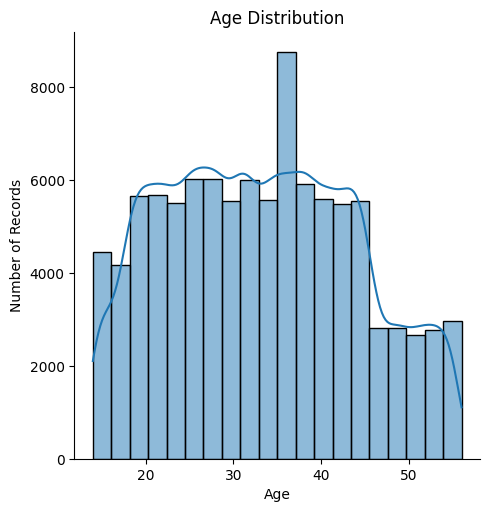

In [24]:
sns.displot(data=df, x=df['Age'], kde=True, bins=20)
plt.xlabel('Age')
plt.ylabel('Number of Records')
plt.title('Age Distribution')
plt.xticks(rotation=0)
plt.show()

#### Feature: SSN(Social Security Number)

In SSN column a random value ('#F%$D@*&8') is repeated for 5572 rows. Let's replace those values with that of same customer IDs.

In [25]:
df['SSN'] = df['SSN'].str.replace('_', '')

In [26]:
def replace_ssn(series):
    # Identify the actual SSN that is not the placeholder
    actual_ssn = series['SSN'][series['SSN'] != '#F%$D@*&8'].iloc[0]

    # Replace the placeholder SSN with the actual SSN
    series['SSN'] = series['SSN'].replace('#F%$D@*&8', actual_ssn)

    return series

In [27]:
df= df.groupby('Customer_ID').apply(replace_ssn).reset_index(drop=True)

#### Feature: Occupation

In [28]:
df['Occupation'].value_counts()

,count
Occupation,
_______,7062
Lawyer,6575
Architect,6355
Engineer,6350
Scientist,6299
Mechanic,6291
Accountant,6271
Developer,6235
Media_Manager,6232


In [29]:
# Function to replace blank occupations with mode of the group
def replace_blank_occupation(series):
    # Calculate the mode of the Occupation within the group
    occupation_mode = series['Occupation'][series['Occupation'] != '_______'].mode().iloc[0]

    # Replace blank occupation with the mode
    series['Occupation'] = series['Occupation'].replace('_______', occupation_mode)

    return series

# Apply the function to each Customer_ID group
df = df.groupby('Customer_ID').apply(replace_blank_occupation).reset_index(drop=True)

In [30]:
df.describe(include = 'object')

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
count,100000,100000,100000,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800
unique,100000,12500,8,10139,12500,15,18940,434,6260,749,3635,4,13178,404,3,91049,7,98790
top,0x1628d,CUS_0x1000,April,Jessicad,913-74-1218,Lawyer,17273.83,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__
freq,1,8,12500,48,8,7096,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9


#### Feature: Annual_Income

In [31]:
df['Annual_Income'].isnull().sum()

0

There are no null values in the Annual_Income column.

In [32]:
# Finding all special characters in the Annual_Income column
special_characters = set()

for value in df['Annual_Income']:
    for char in value:
        if not char.isdigit():
            special_characters.add(char)

print("Special characters in the 'Annual_Income' column:", special_characters)

Special characters in the 'Annual_Income' column: {'.', '_'}


In [33]:
# Removing '_' from the Annual_Income' column
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')

In [34]:
df['Annual_Income'] = df['Annual_Income'].astype('float64')

There are some rows where the annual income is unusually high, but for the same customers there are different income values in other rows. So, let's replace those values using mode values of each customer.

In [35]:
df['Annual_Income'] = df.groupby('Customer_ID')['Annual_Income'].transform(lambda x: x.mode().iloc[0])

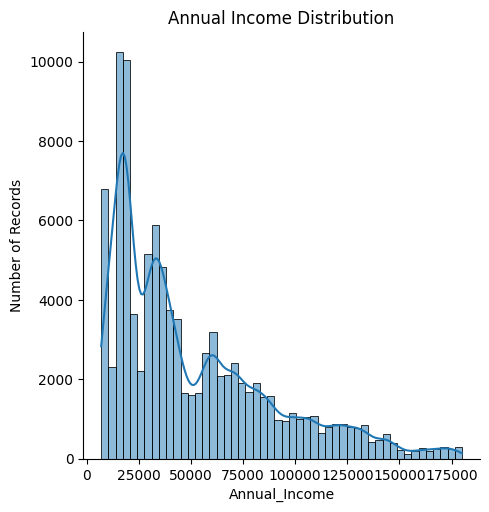

In [36]:
sns.displot(data=df, x=df['Annual_Income'], kde=True, bins=50)
plt.xlabel('Annual_Income')
plt.ylabel('Number of Records')
plt.title('Annual Income Distribution')
plt.xticks(rotation=0)
plt.show()

#### Feature: Num_Bank_Accounts

Replacing the values of 'Num_Bank_Accounts' values using Mode values of each customer.

In [37]:
df['Num_Bank_Accounts'] = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda x: x.mode().iloc[0])

In [38]:
df['Num_Bank_Accounts'].value_counts()

,count
Num_Bank_Accounts,
6,13184
7,12976
8,12936
4,12392
5,12272
3,12096
9,5512
10,5328
1,4552


There are values -1 and 0 under Num_Bank_Accounts column. Replacing those values with 0 as -1 is not possible.

In [39]:
# Replacing the values -1 and 0 wih 0.
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: 0 if x <= 0 else x)

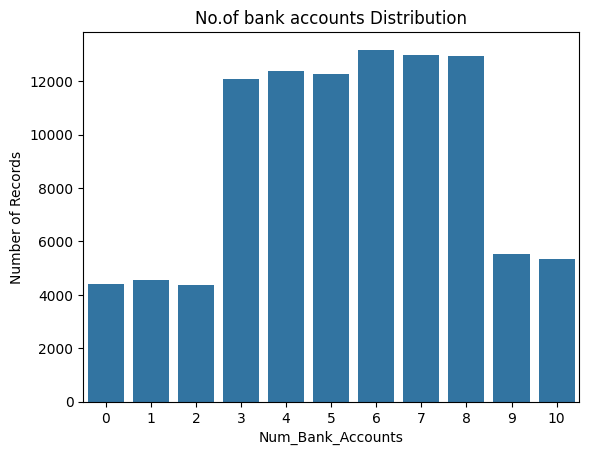

In [40]:
sns.countplot(data=df, x=df['Num_Bank_Accounts'])
plt.xlabel('Num_Bank_Accounts')
plt.ylabel('Number of Records')
plt.title('No.of bank accounts Distribution')
plt.xticks(rotation=0)
plt.show()

- There are some outliers,negative values in Num_Bank_Accounts column.
- After cleaning, there are 11 possible value in this column.
- Num Bank Accounts ranging from 0 to 10.
- Majority ofthe customers has no.of bank accounts between 3 to 8.

#### Feature: Num_Credit_Card

In [41]:
df['Num_Credit_Card'].value_counts()

,count
Num_Credit_Card,
5,18459
7,16615
6,16559
4,14030
3,13277
...,...
422,1
62,1
1348,1


Replacing the values of 'Num_Credit_Card' values using Mode values of each customer, as there are certain values that are generally not possible like having 100s of credit cards.

In [42]:
df['Num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].transform(lambda x: x.mode().iloc[0])

In [43]:
df['Num_Credit_Card'].value_counts()

,count
Num_Credit_Card,
5,18904
7,16984
6,16960
4,14336
3,13576
8,5096
10,4960
9,4736
2,2208


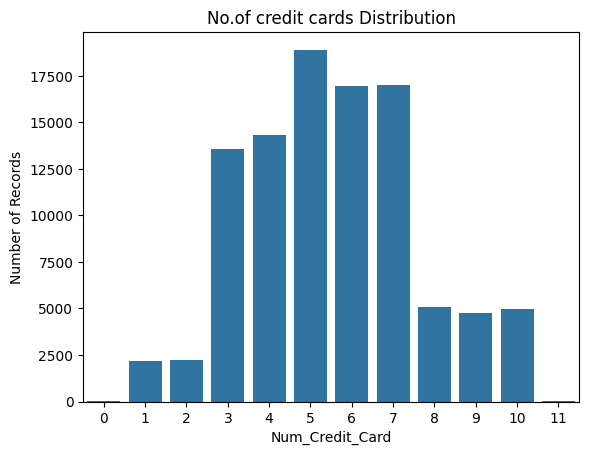

In [44]:
sns.countplot(data=df, x=df['Num_Credit_Card'])
plt.xlabel('Num_Credit_Card')
plt.ylabel('Number of Records')
plt.title('No.of credit cards Distribution')
plt.xticks(rotation=0)
plt.show()

- There are some outliers,negative values in Num_Credit_Card column.
- After cleaning, there are 12 possible value in this column.
- Num Bank Accounts ranging from 0 to 11.
- Majority of the customers has no.of bank accounts between 3 to 7.

#### Feature: Interest_Rate

In [45]:
df['Interest_Rate'].value_counts()

,count
Interest_Rate,
8,5012
5,4979
6,4721
12,4540
10,4540
...,...
295,1
3395,1
4323,1


Replacing the values of 'Interest_Rate' values using Mode values of each customer, as there are certain values that are generally not possible like an interest rate of 4805.

In [46]:
df['Interest_Rate'] = df.groupby('Customer_ID')['Interest_Rate'].transform(lambda x: x.mode().iloc[0])

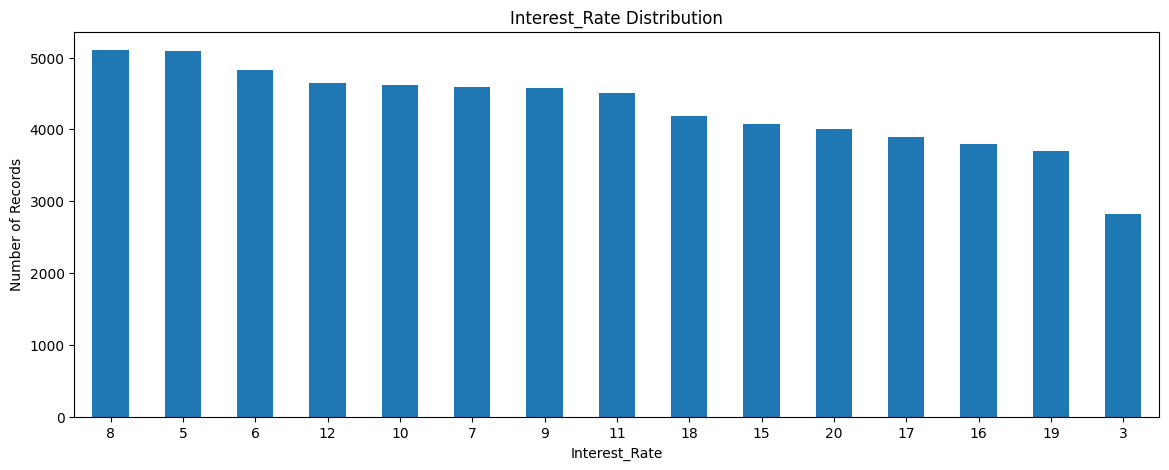

In [47]:
df['Interest_Rate'].value_counts().head(15).plot(kind = 'bar',figsize=(14,5))

plt.xlabel('Interest_Rate')
plt.ylabel('Number of Records')
plt.title('Interest_Rate Distribution')
plt.xticks(rotation=0)
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

#### Feature: Num_of_Loan

In [49]:
df['Num_of_Loan'].unique()

array(['2', '1094', '4', '4_', '0', '0_', '3', '8', '-100', '8_', '1',
       '1_', '9', '7', '1222', '6', '5', '119', '3_', '6_', '2_', '9_',
       '143_', '7_', '5_', '1150', '351', '52', '95', '614', '504',
       '1241', '1496', '17', '966', '330', '290', '193', '520', '50',
       '1265', '352', '571', '190', '995', '55', '433', '590', '661',
       '313', '1027_', '92_', '1017', '904', '1132_', '1008', '49', '737',
       '546', '1096', '1461', '548', '939', '243', '1014', '924', '526',
       '1447', '1228', '1129', '968', '285', '1484', '716', '1236', '801',
       '809', '137', '208', '875', '1187', '621', '350', '911', '1023',
       '855', '802', '967', '1296', '640', '1131_', '639', '1365', '254',
       '1040', '141', '349', '659', '1480', '1259', '889', '70', '344',
       '898', '41', '1412', '1353', '720', '1154', '295', '238', '100',
       '54', '237', '868', '1214', '873', '33', '895', '1482', '1384',
       '182', '1289', '439', '563', '31', '597', '649', '1053', '

In [50]:
# Finding all special characters in the Num_of_Loan column
special_characters = set()

for value in df['Num_of_Loan']:
    for char in value:
        if not char.isdigit():
            special_characters.add(char)

print("Special characters in the 'Num_of_Loan' column:", special_characters)

Special characters in the 'Num_of_Loan' column: {'-', '_'}


In [51]:
# Let's remove these special characters from the Num_of_Loan column
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace(r'[_-]', '', regex=True)

In [52]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

In [53]:
df['Num_of_Loan'].value_counts()

,count
Num_of_Loan,
3,15104
2,15032
4,14743
0,10930
1,10606
...,...
860,1
510,1
438,1


Replacing the values of 'Num_of_Loan' values using Mode values of each customer, as there are certain values that are generally not possible like 777 loans.

In [54]:
df['Num_of_Loan'] = df.groupby('Customer_ID')['Num_of_Loan'].transform(lambda x: x.mode().iloc[0])

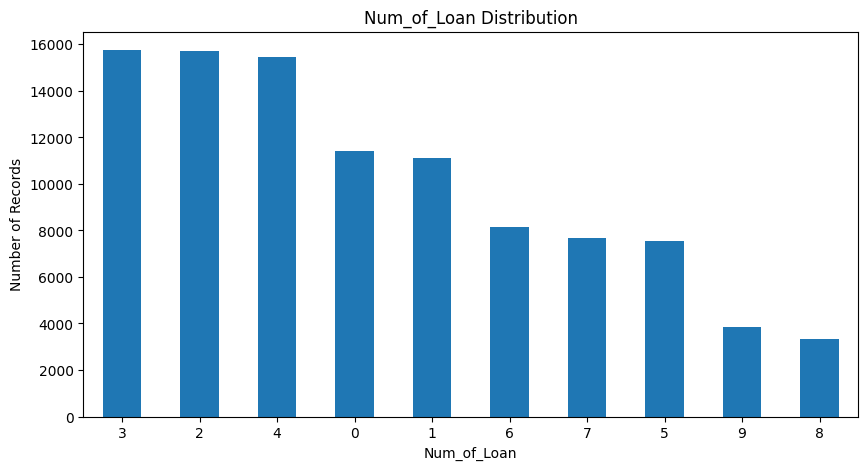

In [55]:
df['Num_of_Loan'].value_counts().plot(kind='bar',figsize=(10,5))
plt.xlabel('Num_of_Loan')
plt.ylabel('Number of Records')
plt.title('Num_of_Loan Distribution')
plt.xticks(rotation=0)
plt.show()

#### Feature: Type_of_Loan

In [56]:
df['Type_of_Loan'].value_counts()

,count
Type_of_Loan,
Not Specified,1408
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264
Student Loan,1240
...,...
"Home Equity Loan, Payday Loan, Credit-Builder Loan, Not Specified, and Home Equity Loan",8
"Personal Loan, Student Loan, Personal Loan, and Home Equity Loan",8
"Home Equity Loan, Payday Loan, Not Specified, and Home Equity Loan",8


In [57]:
df['Type_of_Loan'].isnull().sum()

11408

In [58]:
# Replacing the null values in 'Type_of_Loan' with 'Not Specified'
df['Type_of_Loan'].fillna('Not Specified', inplace=True)

Separating all the types of loans and encoding them by creating columns for each type of loan.

In [59]:
loan_types = df['Type_of_Loan'].str.replace('and', ',').str.get_dummies(', ')

In [60]:
loan_types

,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0,1,0,1,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
99995,1,0,0,1,1,0,1,0,0
99996,1,0,0,1,1,0,1,0,0
99997,1,0,0,1,1,0,1,0,0
99998,1,0,0,1,1,0,1,0,0


In [61]:
# Concatenate the new columns with the original DataFrame and re order them.
df  = pd.concat([df, loan_types], axis=1)

In [62]:
# Re-ordering the columns
df.drop('Type_of_Loan', axis=1, inplace=True)

In [63]:
columns_order = ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Auto Loan',
       'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan',
       'Mortgage Loan', 'Not Specified', 'Payday Loan', 'Personal Loan',
       'Student Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']
df=df[columns_order]

#### Feature: Delay_from_due_date

In [64]:
df['Delay_from_due_date'].unique()

array([64, 57, 62, 67, 10,  5,  8,  3, 14, 19,  9, 27, 29, 12, 16,  6, 24,
        0, -4, -5,  1, 15, 23, 28, 18, 13, 11, 25, 50, 47, 48, 46,  7,  2,
       -3,  4, 30, 21, 17, 20, 22, 35, 40, 26, 31, 58, 59, 63, 37, 42, 43,
       38, 55, 41, 36, 52, 54, 53, 49, -2, 44, 39, 61, 34, 33, -1, 45, 51,
       60, 66, 56, 32, 65])

There are some negative values as well in this column. This denotes that the payment has been made before the due date.
Values are in the range of -5 to 67.

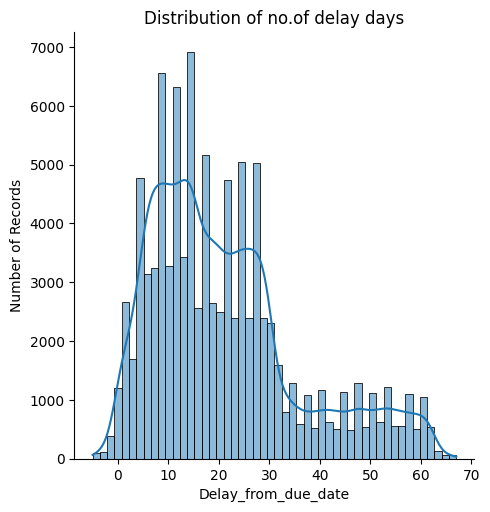

In [65]:
sns.displot(data=df, x=df['Delay_from_due_date'], kde=True, bins=50)
plt.xlabel('Delay_from_due_date')
plt.ylabel('Number of Records')
plt.title('Distribution of no.of delay days')
plt.xticks(rotation=0)
plt.show()

Most no.of customer's delays in payments are under 30 days.

#### Feature: Num_of_Delayed_Payment

In [66]:
df['Num_of_Delayed_Payment'].unique()

array(['25', '26', '23', '28', '18', '16', '1749', '19', '7', '8', '9',
       '15', '13', nan, '12', '17_', '10', '20', '22', '1', '5', '2',
       '11', '17', '15_', '14', '3', '4', '6', '21', '8_', '11_', '0',
       '2230', '24', '18_', '-2', '19_', '1636', '20_', '-1', '16_',
       '921', '9_', '1766', '21_', '12_', '6_', '1_', '25_', '0_', '-3',
       '1572', '5_', '14_', '3_', '3162', '27', '1034', '4211', '4_',
       '2712', '1832', '22_', '3251', '7_', '867', '13_', '4106', '3951',
       '2216', '24_', '10_', '2_', '1640', '2142_', '754', '974', '1180',
       '1359', '320', '2250', '3621', '2438', '531', '3738', '2566',
       '719', '4326', '223', '1833', '3881', '23_', '439', '1614', '3495',
       '960', '4075', '3119', '4302', '121', '2081', '3894', '3484',
       '2594', '4126', '3944', '2553', '1820', '819', '27_', '3629',
       '2080', '1480', '2801', '359', '94', '473', '2072', '2604', '306',
       '1633', '4262', '2488', '2008', '2955', '1647', '1691', '468',
 

In [67]:
# Finding all special characters in the Num_of_Delayed_Payment column
special_characters = set()

for value in df['Num_of_Delayed_Payment']:
    if isinstance(value, str):  # Checks if the value is a string
        for char in value:
            if not char.isdigit():
                special_characters.add(char)
    elif isinstance(value, float) and not pd.isna(value):
        # Handles float values that are not NaN by converting them to strings
        value_str = str(int(value))
        for char in value_str:
            if not char.isdigit():
                special_characters.add(char)

print("Special characters in the 'Num_of_Delayed_Payment' column:", special_characters)

Special characters in the 'Num_of_Delayed_Payment' column: {'-', '_'}


In [68]:
# Let's remove these special characters from the Num_of_Delayed_Payment column
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace(r'[_-]', '', regex=True)

In [69]:
# Changing the datatype to 'int'
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)

In [70]:
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.mode().iloc[0])

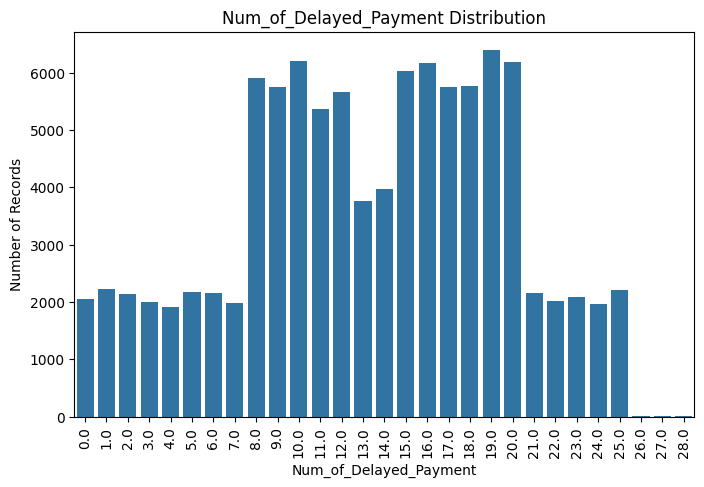

In [71]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=df['Num_of_Delayed_Payment'])
plt.xlabel('Num_of_Delayed_Payment')
plt.ylabel('Number of Records')
plt.title('Num_of_Delayed_Payment Distribution')
plt.xticks(rotation=90)
plt.show()

#### Feature: Changed_Credit_Limit

In [72]:
df['Changed_Credit_Limit'].value_counts()

,count
Changed_Credit_Limit,
_,2091
8.22,135
11.5,127
11.32,126
7.35,121
...,...
-2.02,1
35.84,1
-4.88,1


In [73]:
df['Changed_Credit_Limit'].isnull().sum()

0

There are no null values in this column.

In [74]:
# Finding all special characters in the Changed_Credit_Limit column
special_characters = set()

for value in df['Changed_Credit_Limit']:
    for char in value:
        if not char.isdigit():
            special_characters.add(char)

print("Special characters in the 'Changed_Credit_Limit' column:", special_characters)

Special characters in the 'Changed_Credit_Limit' column: {'-', '.', '_'}


In [75]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_', '')

In [76]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('', '0')

In [77]:
df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.mode().iloc[0])

In [78]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

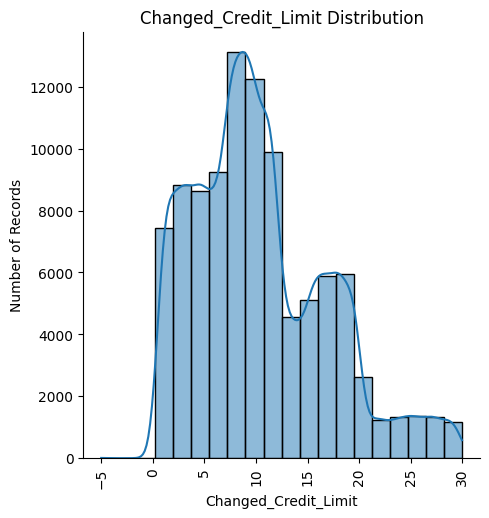

In [79]:
sns.displot(data=df, x=df['Changed_Credit_Limit'], kde=True, bins=20)
plt.xlabel('Changed_Credit_Limit')
plt.ylabel('Number of Records')
plt.title('Changed_Credit_Limit Distribution')
plt.xticks(rotation=90)
plt.show()

There are some negative values in this column which might indicate the percentage decrease in the Credit limit.

#### Feature: Num_Credit_Inquiries

In [80]:
df['Num_Credit_Inquiries'].value_counts()

,count
Num_Credit_Inquiries,
4.0,11271
3.0,8890
6.0,8111
7.0,8058
2.0,8028
...,...
253.0,1
2352.0,1
2261.0,1


In [81]:
df['Num_Credit_Inquiries'].isnull().sum()

1965

In [82]:
# Grouping by 'Customer_ID' to check if there is more than one unique 'Num_Credit_Inquiries' value
customers_with_different_inquiries = df.groupby('Customer_ID')['Num_Credit_Inquiries'].nunique()

# Filtering to find customers with more than one unique value
customers_with_different_inquiries = customers_with_different_inquiries[customers_with_different_inquiries > 1]

# Display customers with different 'Num_Credit_Inquiries'
print(customers_with_different_inquiries)

Customer_ID
CUS_0x1000    2
CUS_0x1009    2
CUS_0x100b    3
CUS_0x1011    2
CUS_0x1015    2
             ..
CUS_0xfe4     2
CUS_0xfe5     2
CUS_0xff3     2
CUS_0xffc     2
CUS_0xffd     2
Name: Num_Credit_Inquiries, Length: 7830, dtype: int64


There are multiple customers who has different 'Num_Credit_Inquiries' values.

Replacing the the abnormal values using mode values of each customer.

In [83]:
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.mode().iloc[0])

In [84]:
df['Num_Credit_Inquiries'].isnull().sum()

0

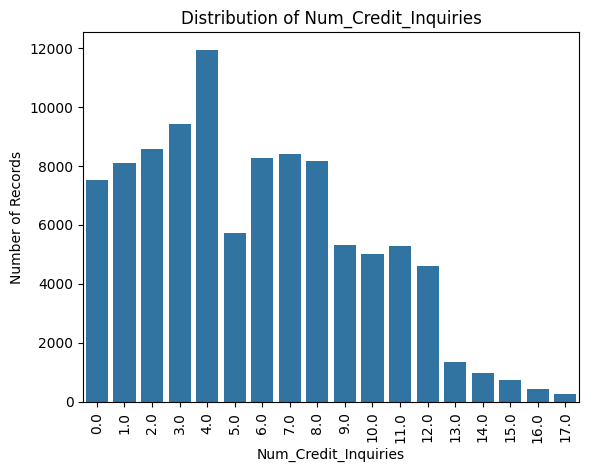

In [85]:
sns.countplot(data=df, x=df['Num_Credit_Inquiries'])
plt.xlabel('Num_Credit_Inquiries')
plt.ylabel('Number of Records')
plt.title('Distribution of Num_Credit_Inquiries')
plt.xticks(rotation=90)
plt.show()

#### Feature: Credit_Mix

In [86]:
df['Credit_Mix'].value_counts()

,count
Credit_Mix,
Standard,36479
Good,24337
_,20195
Bad,18989


More than 20k values are blanks.

In [87]:
df['Credit_Mix'].isnull().sum()

0

There are no null values apart from the blanks. So, let's replace those values with NaNs.

In [88]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

Replacing those null values using the values from previous or next rows of that customers.

In [89]:
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].fillna(method='ffill').fillna(method='bfill')

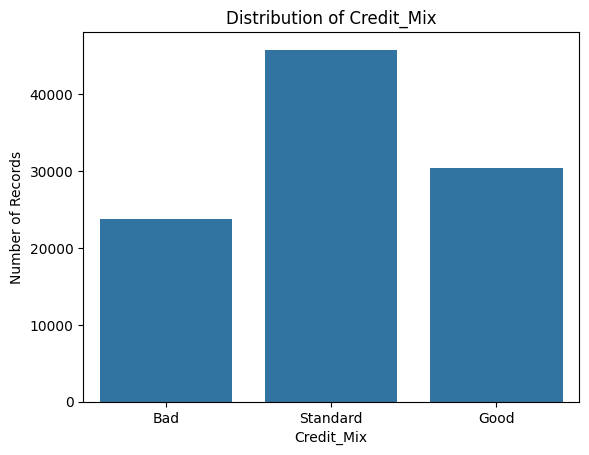

In [90]:
sns.countplot(data=df, x=df['Credit_Mix'])
plt.xlabel('Credit_Mix')
plt.ylabel('Number of Records')
plt.title('Distribution of Credit_Mix')
plt.xticks(rotation=0)
plt.show()

#### Feature: Outstanding_Debt

In [91]:
df['Outstanding_Debt'].value_counts()

,count
Outstanding_Debt,
1360.45,24
460.46,23
1151.7,23
1109.03,23
100.3,16
...,...
3530.13_,1
1181.44_,1
4078.71_,1


In [92]:
df['Outstanding_Debt'].isnull().sum()

0

There are no null values in this column.

In [93]:
# Finding all special characters in the Outstanding_Debt column
special_characters = set()

for value in df['Outstanding_Debt']:
    for char in value:
        if not char.isdigit():
            special_characters.add(char)

print("Special characters in the 'Outstanding_Debt' column:", special_characters)

Special characters in the 'Outstanding_Debt' column: {'.', '_'}


In [94]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')

In [95]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

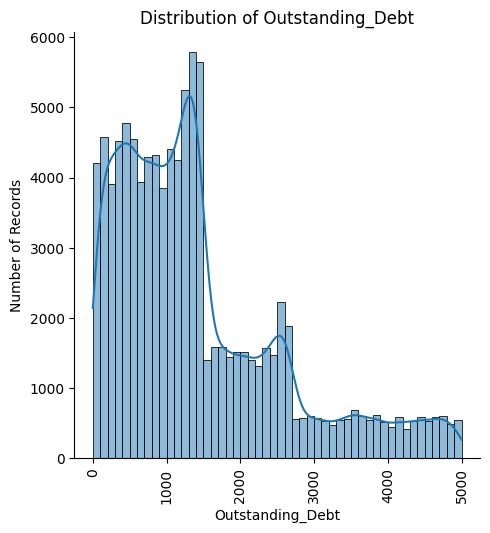

In [96]:
sns.displot(data=df, x=df['Outstanding_Debt'], kde=True, bins=50)
plt.xlabel('Outstanding_Debt')
plt.ylabel('Number of Records')
plt.title('Distribution of Outstanding_Debt')
plt.xticks(rotation=90)
plt.show()

#### Feature: Credit_Utilization_Ratio

In [97]:
df['Credit_Utilization_Ratio'].value_counts()

,count
Credit_Utilization_Ratio,
33.163023,2
26.407909,2
32.843081,1
36.018284,1
28.000156,1
...,...
36.497570,1
30.542227,1
38.840823,1


In [98]:
df['Credit_Utilization_Ratio'].isnull().sum()

0

There are no null values in this column.

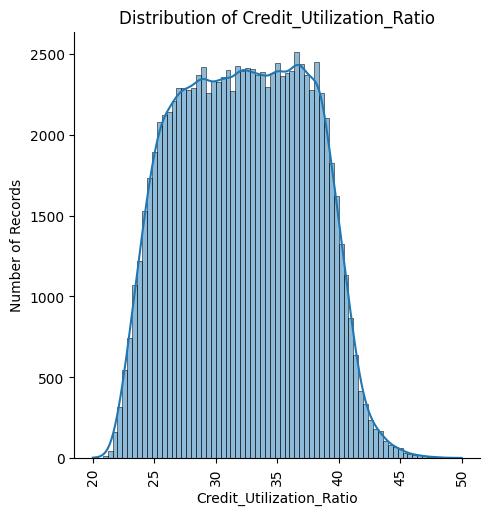

In [99]:
sns.displot(data=df, x=df['Credit_Utilization_Ratio'], kde=True, bins=75)
plt.xlabel('Credit_Utilization_Ratio')
plt.ylabel('Number of Records')
plt.title('Distribution of Credit_Utilization_Ratio')
plt.xticks(rotation=90)
plt.show()

Credit_Utilization_Ratio seems to be following a normal distribution.

#### Feature: Credit_History_Age

In [100]:
df['Credit_History_Age'].value_counts()

,count
Credit_History_Age,
15 Years and 11 Months,446
19 Years and 4 Months,445
19 Years and 5 Months,444
17 Years and 11 Months,443
19 Years and 3 Months,441
...,...
0 Years and 3 Months,20
0 Years and 2 Months,15
33 Years and 7 Months,14


In [101]:
df['Credit_History_Age'].isnull().sum()

9030

Let's replace these null values using mode values of each customer.

In [102]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.mode().iloc[0])

In [103]:
df['Credit_History_Age'].isnull().sum()

0

The credit history values are in string format which is of no use. So, let's convert these into no.of months.

In [104]:
def convert_to_months(age_str):
    parts = age_str.split()
    years = int(parts[0])
    months = int(parts[3])
    total_months = (years * 12) + months
    return total_months

# Apply the function to the 'Credit_History_Age' column
df['Credit_History_Age_in_Months'] = df['Credit_History_Age'].apply(convert_to_months)

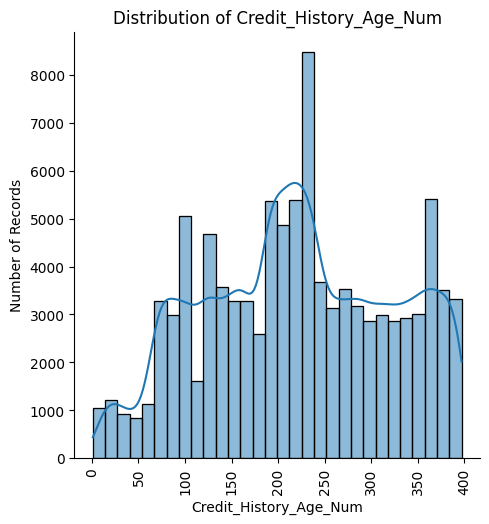

In [105]:
sns.displot(data=df, x=df['Credit_History_Age_in_Months'], kde=True, bins=30)
plt.xlabel('Credit_History_Age_Num')
plt.ylabel('Number of Records')
plt.title('Distribution of Credit_History_Age_Num')
plt.xticks(rotation=90)
plt.show()

In [106]:
# Dropping the original 'Credit_History_Age' column
df.drop('Credit_History_Age', axis=1, inplace=True)

#### Feature: Payment_of_Min_Amount

In [107]:
df['Payment_of_Min_Amount'].isnull().sum()

0

In [108]:
df['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


In [109]:
df['Payment_of_Min_Amount'].value_counts(normalize= True)*100

,proportion
Payment_of_Min_Amount,
Yes,52.326
No,35.667
NM,12.007


More than 52% has only paid the minimum amount needed.

#### Feature: Total_EMI_per_month

In [110]:
df['Total_EMI_per_month'].isnull().sum()

0

There are no null values in this column.

In [111]:
df['Total_EMI_per_month'].value_counts()

,count
Total_EMI_per_month,
0.000000,10613
42.941090,8
72.798279,8
119.461755,8
263.655491,8
...,...
39156.000000,1
26128.000000,1
75532.000000,1


In [112]:
print(df['Total_EMI_per_month'].dtype)

float64


In [113]:
print(f"The minimum value of 'Total_EMI_per_month' is: {df['Total_EMI_per_month'].min()}")
print(f"The maximum value of 'Total_EMI_per_month' is: {df['Total_EMI_per_month'].max()}")

The minimum value of 'Total_EMI_per_month' is: 0.0
The maximum value of 'Total_EMI_per_month' is: 82331.0


In [114]:
df['Total_EMI_per_month'] = df.groupby('Customer_ID')['Total_EMI_per_month'].transform(lambda x: x.mode().iloc[0])

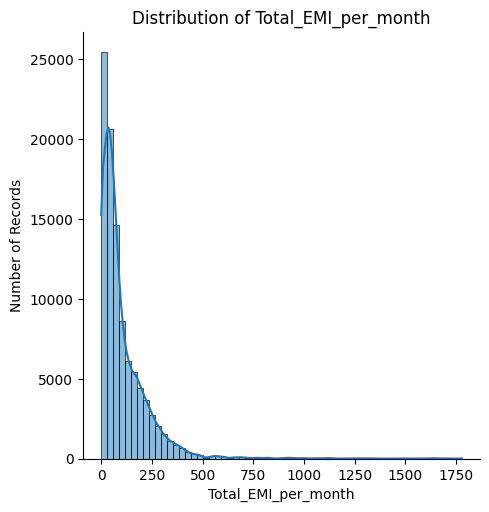

In [115]:
sns.displot(data=df, x=df['Total_EMI_per_month'], kde=True, bins=60)
plt.xlabel('Total_EMI_per_month')
plt.ylabel('Number of Records')
plt.title('Distribution of Total_EMI_per_month')
plt.xticks(rotation=0)
plt.show()

#### Feature: Amount_invested_monthly

In [116]:
df['Amount_invested_monthly'].value_counts()

,count
Amount_invested_monthly,
__10000__,4305
0,169
87.90990881,1
459.5317247,1
752.475627,1
...,...
105.7266479,1
138.9942681,1
289.9612607,1


In [117]:
df['Amount_invested_monthly'].isnull().sum()

4479

In [118]:
print(df['Amount_invested_monthly'].dtype)

object


In [119]:
# Finding all special characters in the Amount_invested_monthly column
special_characters = set()

for value in df['Amount_invested_monthly']:
    if isinstance(value, str):  # Check if the value is a string
        for char in value:
            if not char.isdigit():
                special_characters.add(char)
    elif isinstance(value, float) and not pd.isna(value):
        # Handle float values that are not NaN by converting them to strings
        value_str = str(int(value))
        for char in value_str:
            if not char.isdigit():
                special_characters.add(char)

print("Special characters in the 'Amount_invested_monthly' column:", special_characters)

Special characters in the 'Amount_invested_monthly' column: {'.', '_'}


In [120]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '')

In [121]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace(0, np.nan)

In [122]:
df['Amount_invested_monthly'].isna().sum()

4479

In [125]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

In [126]:
mean_per_customer = df.groupby('Customer_ID')['Amount_invested_monthly'].mean()
mask = df['Amount_invested_monthly'].isna()
df.loc[mask, 'Amount_invested_monthly'] = df.loc[mask, 'Customer_ID'].map(mean_per_customer)

In [127]:
df['Amount_invested_monthly'].isna().sum()

0

In [128]:
print(f"The minimum value of 'Amount_invested_monthly' is: {df['Amount_invested_monthly'].min()}")
print(f"The maximum value of 'Amount_invested_monthly' is: {df['Amount_invested_monthly'].max()}")

The minimum value of 'Amount_invested_monthly' is: 0.0
The maximum value of 'Amount_invested_monthly' is: 10000.0


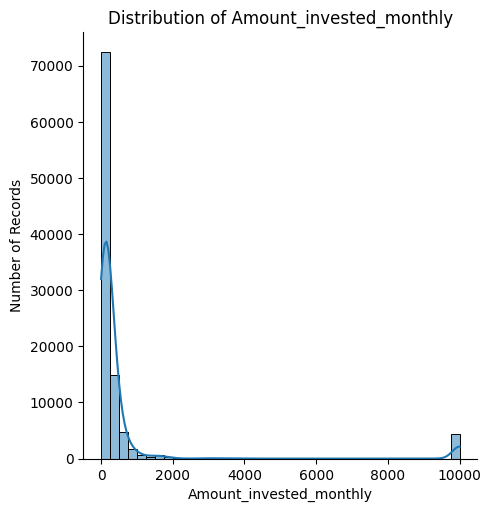

In [129]:
sns.displot(data=df, x=df['Amount_invested_monthly'], kde=True, bins=40)
plt.xlabel('Amount_invested_monthly')
plt.ylabel('Number of Records')
plt.title('Distribution of Amount_invested_monthly')
plt.xticks(rotation=0)
plt.show()

#### Feature: Payment_Behaviour

In [133]:
df['Payment_Behaviour'].isnull().sum()

0

In [132]:
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,25513
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425
!@9#%8,7600


In [134]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)
df['Payment_Behaviour'] = df.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x: x.fillna(x.mode().iloc[0]))
print(df['Payment_Behaviour'].value_counts())

Payment_Behaviour
Low_spent_Small_value_payments      27767
High_spent_Medium_value_payments    19366
High_spent_Large_value_payments     15348
Low_spent_Medium_value_payments     14621
High_spent_Small_value_payments     11980
Low_spent_Large_value_payments      10918
Name: count, dtype: int64


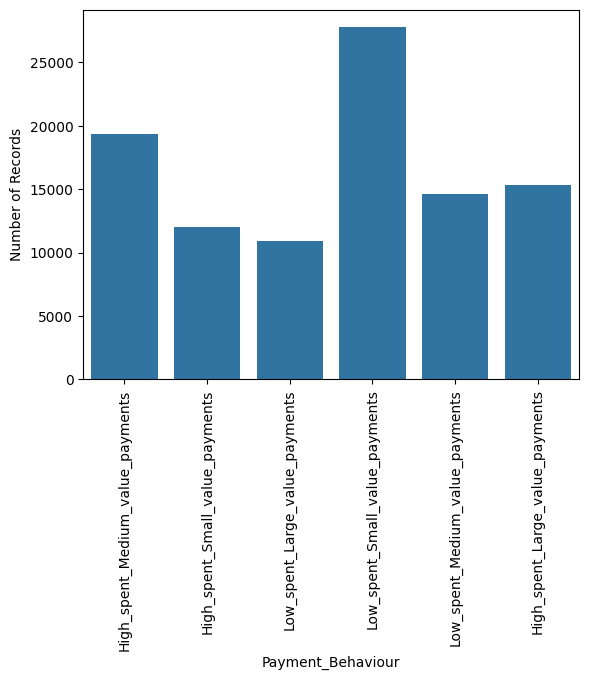

In [136]:
sns.countplot(data=df, x=df['Payment_Behaviour'])
plt.xlabel('Payment_Behaviour')
plt.ylabel('Number of Records')
plt.xticks(rotation=90)
plt.show()

- A larger portion of the payments are of Low_spent_Small_value_payments.

#### Feature: Monthly_Balance

In [138]:
df['Monthly_Balance'].isnull().sum()

1200

In [139]:
df['Monthly_Balance'].value_counts()

,count
Monthly_Balance,
__-333333333333333333333333333__,9
350.0148691,2
695.0571561,2
419.7651674,1
615.6677195,1
...,...
259.3760946,1
343.7619864,1
288.6680278,1


In [140]:
df['Monthly_Balance'] = df['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan)

In [141]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Monthly_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.fillna(x.mean()))

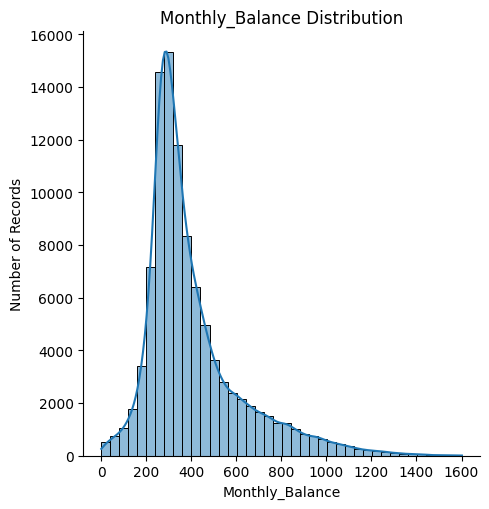

In [142]:
sns.displot(data=df, x=df['Monthly_Balance'], kde=True, bins=40)
plt.xlabel('Monthly_Balance')
plt.ylabel('Number of Records')
plt.title('Monthly_Balance Distribution')
plt.xticks(rotation=0)
plt.show()

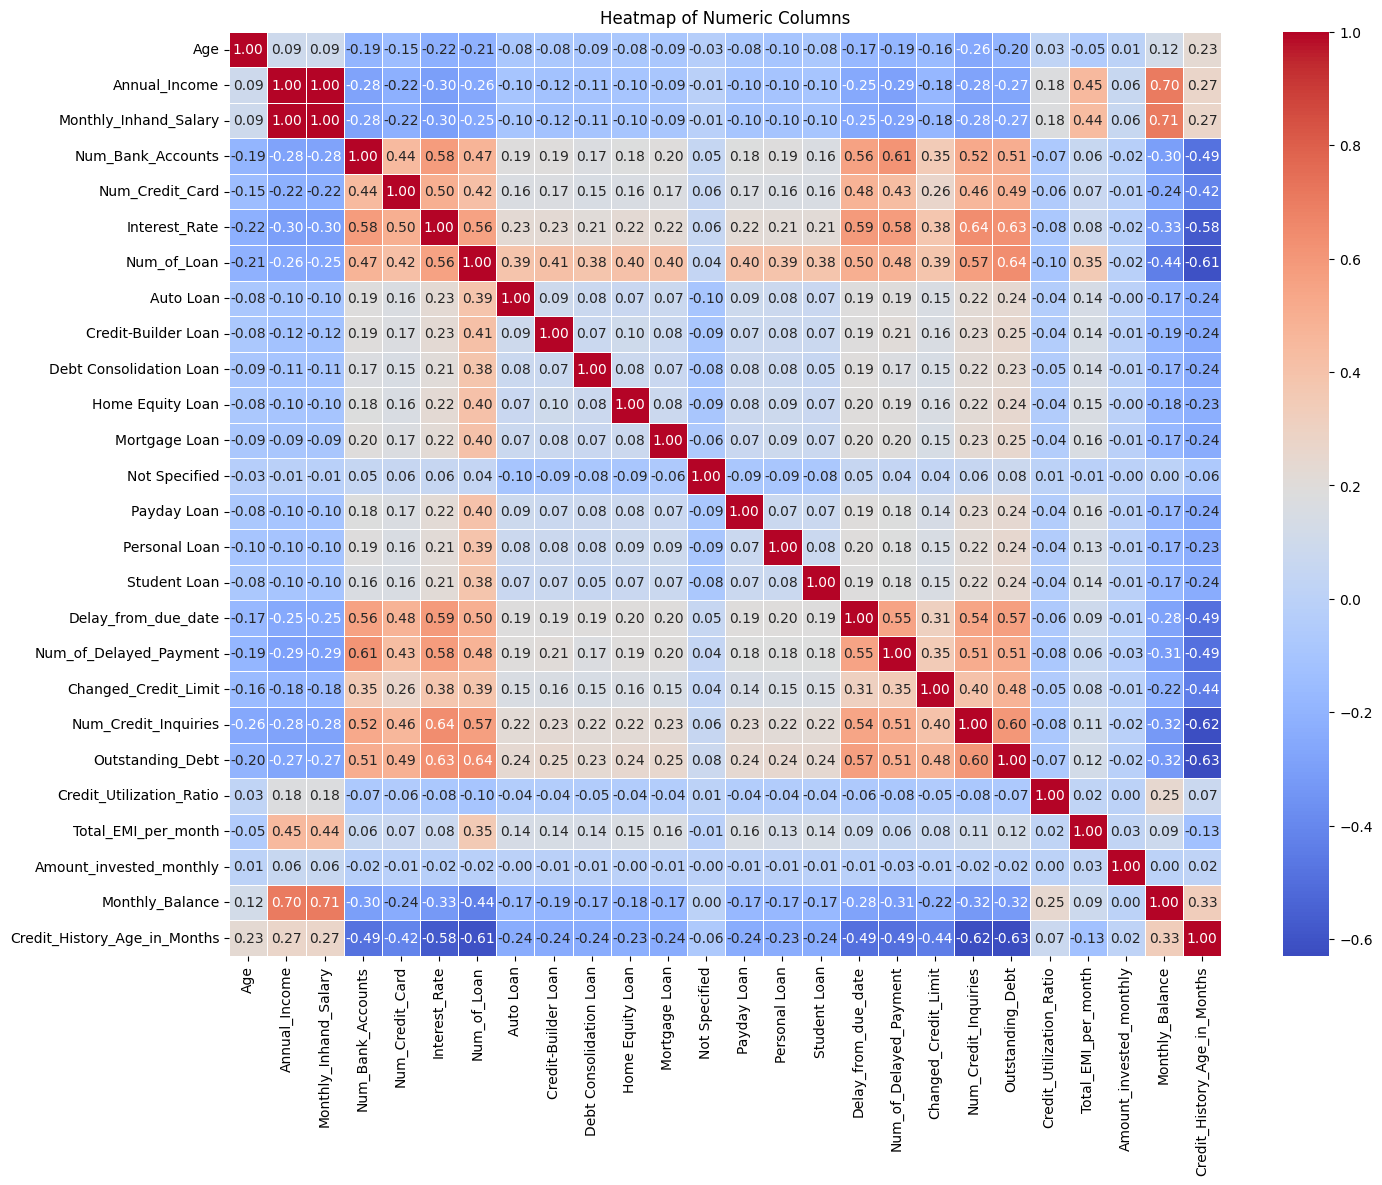

In [148]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Numeric Columns')
plt.show()

- Positive correlations exist among features such as Num_Credit_Inquiries, Outstanding Debt, Num_of_Delayed_Payment, and Num_Bank_Accounts.
- Monthly Inhand Salary is moderately positively correlated with Amount Invested Monthly (0.44), indicating that higher in-hand salaries are associated with higher monthly investments.
- Strong positive correlations are observed between features like Annual Income, Monthly Inhand Salary, Monthly Balance, and Amount Invested Monthly.
- Moderate to strong negative correlations can be seen between Credit History Age, Outstanding Debt, Num_of_Loan, and Interest Rate.

### **Feature Engineering:**

#### Label Encoding:

In [149]:
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace({"Yes": 1, "No": 0, "NM": 0})

In [150]:
df["Credit_Mix"] = df["Credit_Mix"].replace({"Standard": 1, "Good": 2, "Bad": 0})

In [151]:
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace({
      "Low_spent_Small_value_payments": 1,
      "High_spent_Medium_value_payments": 2,
      "Low_spent_Medium_value_payments": 3,
      "High_spent_Large_value_payments": 4,
      "High_spent_Small_value_payments": 5,
      "Low_spent_Large_value_payments": 6
  })

#### **Monthly Debt Repayment Capacity:**

Let's create a feature that represents the capacity of a person to repay debts on a monthly basis.

In [152]:
df['Monthly_Debt_Repayment_Capacity'] = df['Monthly_Inhand_Salary'] - df['Total_EMI_per_month']

#### **Debt to Income Ratio:**

In [153]:
# Calculating Debt to Income ratio
df['Monthly_Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Monthly_Inhand_Salary']

#### **Payment history score:**

Combining features like Delay_from_due_date, Num_of_Delayed_Payment, and Payment_of_Min_Amount into a single score.

In [154]:
df["Payment_History_Score"] = (-1 * df["Delay_from_due_date"]-1 * df["Num_of_Delayed_Payment"]+ 1 * df["Payment_of_Min_Amount"])

## **Credit Score Calculation:**

Selected features for credit score calulcation with their weights:
1. Payment history score
  - Weight: 0.30
  - Strongest predictor of future credit behavior.
2. Credit History Age in Months
  - Weight: 0.20
  - Longer credit history indicates responsible credit usage.Weighted moderately to reflect its significance.
3. Monthly Debt-to-Income Ratio (MDTIR)
  - Weight: 0.15
  - Lower ratio indicates better ability to manage debt.Weighted lower due to potential fluctuations in income.
4. Credit Utilization Ratio
  - Weight: 0.10
  - Lower ratio suggests responsible credit card usage.Weighted lower as it's a snapshot of current utilization.
5. Monthly Debt Repayment Capacity
  - Weight: 0.05
  - Reflects ability to manage existing debt.
6. Outstanding Debt
  - Weight: 0.05
  - Higher debt increases risk of default.
7. Num_Credit_Inquiries
  - Weight: 0.05
  - Fewer inquiries suggest lower credit-seeking behavior.
8. Payment Behaviour
  - Weight: 0.05
  - Insights into spending patterns and payment tendencies.
9. Credit Mix
  - Weight: 0.05
  - Taking different types of credit

In [156]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_in_Months,Monthly_Debt_Repayment_Capacity,Monthly_Debt_to_Income_Ratio,Payment_History_Score
0,0x1628d,CUS_0x1000,April,Alistair Barrf,17.0,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,0,1,0,1,0,0,0,0,0,64,25.0,1.63,11.0,0,1562.91,32.843081,1,42.94109,87.909909,2,419.765167,122,2663.220577,0.577538,-88.0
1,0x16291,CUS_0x1000,August,Alistair Barrf,17.0,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,0,1,0,1,0,0,0,0,0,57,25.0,1.63,11.0,0,1562.91,30.077191,1,42.94109,77.314276,2,400.360800,122,2663.220577,0.577538,-81.0
2,0x1628b,CUS_0x1000,February,Alistair Barrf,17.0,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,0,1,0,1,0,0,0,0,0,62,25.0,1.63,11.0,0,1562.91,29.439759,1,42.94109,176.132567,5,311.542510,122,2663.220577,0.577538,-86.0
3,0x1628a,CUS_0x1000,January,Alistair Barrf,17.0,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,0,1,0,1,0,0,0,0,0,62,25.0,1.63,11.0,0,1562.91,26.612093,1,42.94109,244.750283,6,252.924793,122,2663.220577,0.577538,-86.0
4,0x16290,CUS_0x1000,July,Alistair Barrf,17.0,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,0,1,0,1,0,0,0,0,0,62,25.0,1.63,11.0,0,1562.91,38.149539,1,42.94109,266.597160,1,251.077916,122,2663.220577,0.577538,-86.0


In [157]:
def calculate_credit_score(data):

  # Group by Customer ID, handling month-level data and calculating scores
  grouped_data = data.groupby("Customer_ID").agg(
      Payment_History_Score=("Payment_History_Score", "mean"),
      Credit_History_Age_in_Months=("Credit_History_Age_in_Months", "max"),  # Use maximum history age
      Monthly_Debt_to_Income_Ratio=("Monthly_Debt_to_Income_Ratio", "mean"),
      Credit_Utilization_Ratio=("Credit_Utilization_Ratio", "mean"),
      Monthly_Debt_Repayment_Capacity=("Monthly_Debt_Repayment_Capacity",'mean'),
      Outstanding_Debt=("Outstanding_Debt", "mean"),
      Num_Credit_Inquiries=("Num_Credit_Inquiries", "sum"),
      Payment_Behaviour=("Payment_Behaviour","mean"),# Use average payment behaviour encoding
      Credit_Mix=("Credit_Mix","mean")
  )

    # Standardize values for numerical features
  grouped_data = (grouped_data - grouped_data.mean()) / grouped_data.std()

  # Calculate weighted scores
  grouped_data["credit_score"] = (
      0.30 * grouped_data["Payment_History_Score"]
      + 0.20 * grouped_data["Credit_History_Age_in_Months"]
      + 0.15 * (1-grouped_data["Monthly_Debt_to_Income_Ratio"]) #Inverse relation as lower the value better the financials
      + 0.10 * (1-grouped_data["Credit_Utilization_Ratio"]) #inverse relation
      + 0.05 * grouped_data["Monthly_Debt_Repayment_Capacity"]
      + 0.05 * grouped_data["Outstanding_Debt"]
      + 0.05 * (1-grouped_data["Num_Credit_Inquiries"]) #Inverse relation
      + 0.05 * grouped_data["Payment_Behaviour"]
      + 0.05 * grouped_data["Credit_Mix"]
  )

  # Normalize scores to a range of 0 to 100
  grouped_data["credit_score"] = (grouped_data["credit_score"] - grouped_data["credit_score"].min()) / (grouped_data["credit_score"].max() - grouped_data["credit_score"].min()) * 100
  # Map scores to the original FICO scale (300 to 850)
  min_range, max_range = 300, 850
  grouped_data["credit_score"] = (grouped_data["credit_score"] * (max_range - min_range) / 100) + min_range

  return grouped_data.reset_index()


# Calculate scores for all customers
credit_scores_df = calculate_credit_score(df)
credit_scores_df[["Customer_ID","credit_score"]]

,Customer_ID,credit_score
0,CUS_0x1000,495.209390
1,CUS_0x1009,765.188547
2,CUS_0x100b,725.973300
3,CUS_0x1011,678.702490
4,CUS_0x1013,731.594456
...,...,...
12495,CUS_0xff3,682.254930
12496,CUS_0xff4,687.777869
12497,CUS_0xff6,799.645989
12498,CUS_0xffc,561.442435


In [158]:
min_value=credit_scores_df['credit_score'].min()
credit_scores_df[credit_scores_df['credit_score'] == min_value]

,Customer_ID,Payment_History_Score,Credit_History_Age_in_Months,Monthly_Debt_to_Income_Ratio,Credit_Utilization_Ratio,Monthly_Debt_Repayment_Capacity,Outstanding_Debt,Num_Credit_Inquiries,Payment_Behaviour,Credit_Mix,credit_score
8310,CUS_0x8c6f,-1.830869,-1.507828,10.03639,-0.799074,-1.22304,1.971018,2.696945,-1.124135,-1.454655,300.0


In [159]:
max_value=credit_scores_df['credit_score'].max()
credit_scores_df[credit_scores_df['credit_score'] == max_value]

,Customer_ID,Payment_History_Score,Credit_History_Age_in_Months,Monthly_Debt_to_Income_Ratio,Credit_Utilization_Ratio,Monthly_Debt_Repayment_Capacity,Outstanding_Debt,Num_Credit_Inquiries,Payment_Behaviour,Credit_Mix,credit_score
5701,CUS_0x65bf,1.45596,1.745692,-0.617335,-0.536835,2.484007,-0.796567,-1.222183,1.033527,1.27412,850.0


In [162]:
credit_scores_df.head()

,Customer_ID,Payment_History_Score,Credit_History_Age_in_Months,Monthly_Debt_to_Income_Ratio,Credit_Utilization_Ratio,Monthly_Debt_Repayment_Capacity,Outstanding_Debt,Num_Credit_Inquiries,Payment_Behaviour,Credit_Mix,credit_score
0,CUS_0x1000,-2.808216,-0.985658,-0.148152,0.578666,-0.456160,0.118329,1.390569,0.867553,-1.454655,495.209390
1,CUS_0x1009,0.505390,1.504690,-0.612635,-1.186664,0.015733,-1.059187,-0.960907,-0.626213,-0.090268,765.188547
2,CUS_0x100b,0.712909,-0.302821,-0.559869,1.240576,1.741378,-0.342824,-1.222183,1.033527,1.274120,725.973300
3,CUS_0x1011,-0.405014,-0.302821,-0.574810,-2.246615,0.316782,-0.825057,0.345469,-0.792187,-0.090268,678.702490
4,CUS_0x1013,0.659356,-0.061819,-0.518633,-0.170455,1.162079,-0.166824,-0.699632,-0.626213,1.274120,731.594456


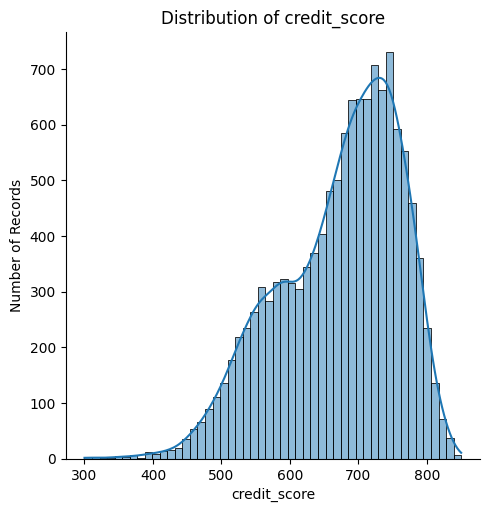

In [161]:
credit_scores_df['credit_score']
sns.displot(data=credit_scores_df, x=credit_scores_df['credit_score'], kde=True, bins=50)
plt.xlabel('credit_score')
plt.ylabel('Number of Records')
plt.title('Distribution of credit_score')
plt.xticks(rotation=0)
plt.show()

### **Insights:**



*   The dataset includes records for 12,500 unique customers, each tracked over an 8-month period from January to August.
*   The dataset covers various loan types: auto loan, credit-builder loan, debt consolidation loan, home equity loan, mortgage loan, not specified, payday loan, personal loan, and student loan.
*   Most customers have a low Annual Income and Monthly Income, with distributions that are right-skewed.
*   The majority of customers have between 3 to 8 bank accounts.
*   The number of credit cards held by customers ranges from 0 to 11, with most having between 3 to 7 cards, peaking at 5.
*   Interest rates vary between 1% and 34%.
*   Very few customers invest more than 2k per month.
*   Typically, customers have between 2 to 4 loans, with a maximum of 9 loans.
*   Customers are generally categorized into Low Spent Small Value Payments and High Spent Medium-Value Payments segments.



### **Recommendation:**

- Get advice from credit analysts and financial professionals to understand what makes someone creditworthy. Their insights can help you pick the right features, design better models, and interpret the results more accurately, making the credit score more reliable.

- Consider broadening the range of features used in credit score calculations. This could include alternative data sources like social media activity, rental payment history, or utility bill payments. Incorporating these new features could provide a more detailed and accurate view of an individual's financial behavior and creditworthiness.

- This credit score model is quite basic, but to make the score more reliable, we can experiment with different weighting schemes or try using different features. Additionally, we can look into other methods, especially machine learning-based solutions, to further improve the accuracy.